In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd
import scipy as sp
import os
import librosa
import pandas as pd
import librosa.display
import matplotlib.pyplot as plt
import cv2
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from keras.models import model_from_json
from keras.models import load_model
from PIL import Image
import csv

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
#we will first attempt to visualise the training set
TRAINING_FOLDER = os.path.join("train", "audio")
labels = ["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go", "_background_noise_"]
data = []
for audio_folder in labels :
        file = os.listdir(os.path.join(TRAINING_FOLDER, audio_folder))[0]
        tmp = os.path.join(TRAINING_FOLDER, audio_folder, file)
        data.append(tmp)
print(data)

['train\\audio\\yes\\004ae714_nohash_0.wav', 'train\\audio\\no\\012c8314_nohash_0.wav', 'train\\audio\\up\\004ae714_nohash_0.wav', 'train\\audio\\down\\00176480_nohash_0.wav', 'train\\audio\\left\\00176480_nohash_0.wav', 'train\\audio\\right\\00b01445_nohash_0.wav', 'train\\audio\\on\\004ae714_nohash_0.wav', 'train\\audio\\off\\00176480_nohash_0.wav', 'train\\audio\\stop\\004ae714_nohash_0.wav', 'train\\audio\\go\\004ae714_nohash_0.wav', 'train\\audio\\_background_noise_\\doing_the_dishes.wav']


I have taken the sampling rate to be 16000. For smaller and bigger rates, I have added silenced or trimmed silence accordingly

yes


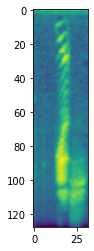

no


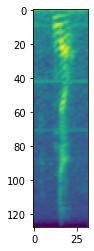

up


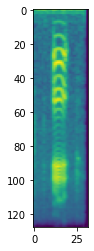

down


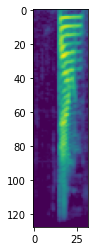

left


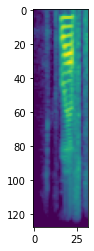

right


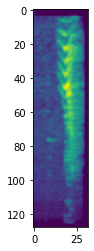

on


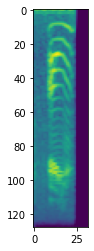

off


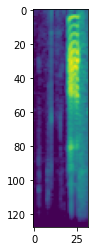

stop


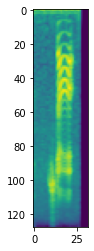

go


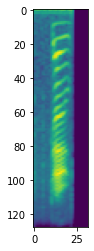

_background_noise_


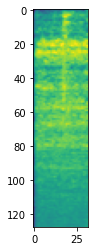

In [3]:
#visualising the mel spectrogram for these files
for i in range(len(data)) :
    audio_file_arr, sr = librosa.load(data[i], sr=16000)
    audio_file_arr = librosa.util.fix_length(audio_file_arr, 16000)
#     print(audio_file_path)
    conv_numpy = librosa.util.fix_length(audio_file_arr, 16000)
    D = np.abs(librosa.stft(audio_file_arr))**2
    S = librosa.feature.melspectrogram(S=D, sr=16000, n_mels=128, fmax=8000)
    K = librosa.power_to_db(S,ref=np.max)
    print(labels[i])
    plt.imshow(K)
    plt.show() 

##### We notice that the size of the background noise file is too large. Hence we will clip these files into 1 second files and then using these files, we will train our data for the silence label

##### We could also features like spectral centroid, which have been ignored for the purpose of this project.